Processing parameter vivify: 100%|████████████████████████████████████████████████████████████████| 23/23 [10:50<00:00, 28.28s/it]


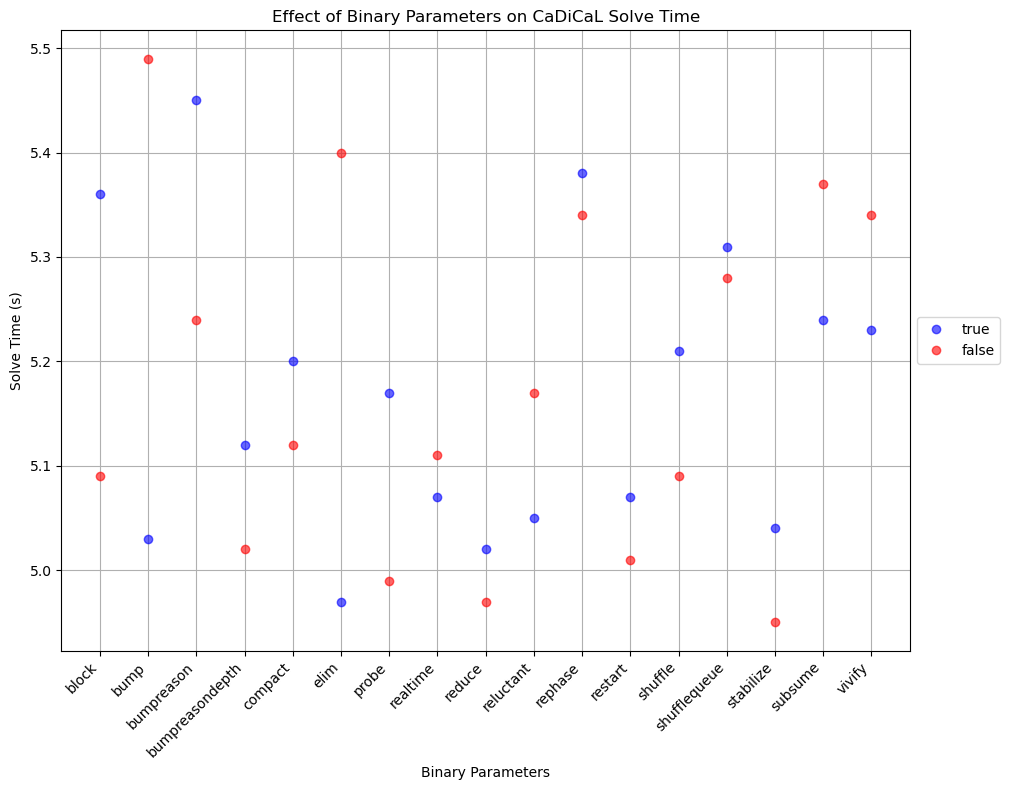

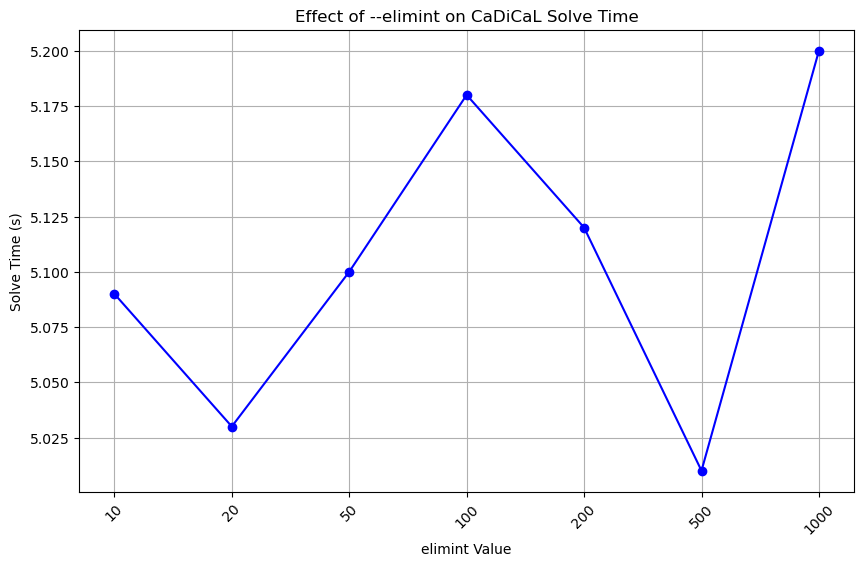

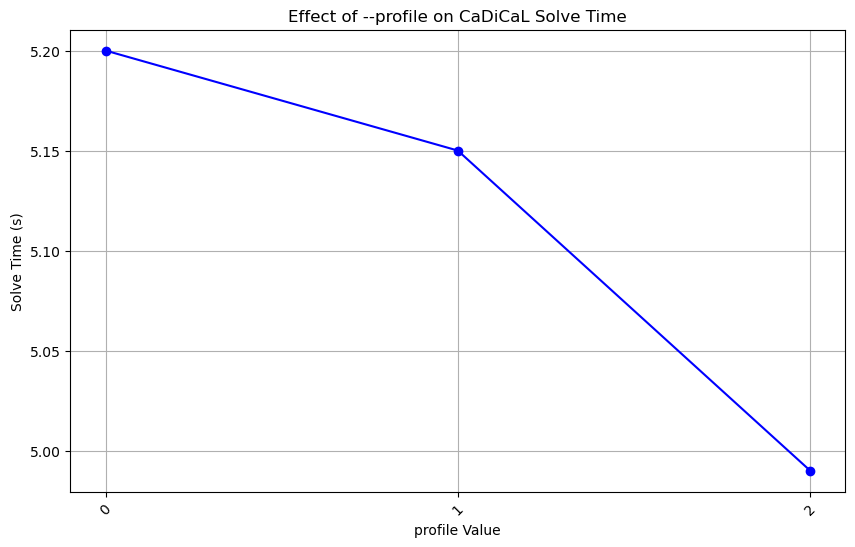

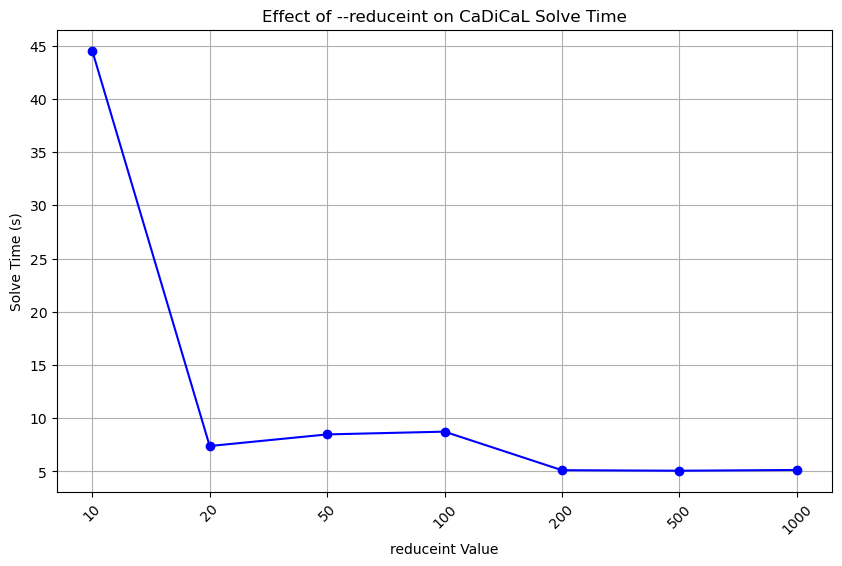

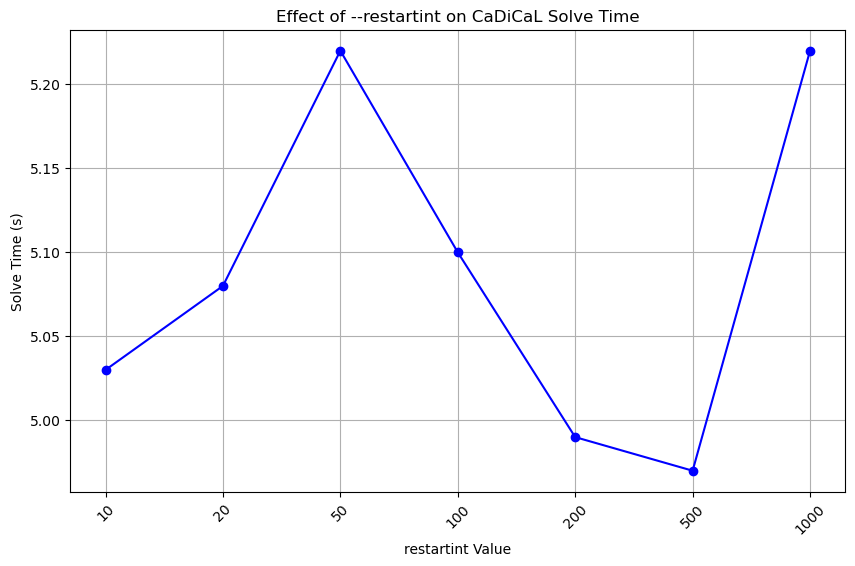

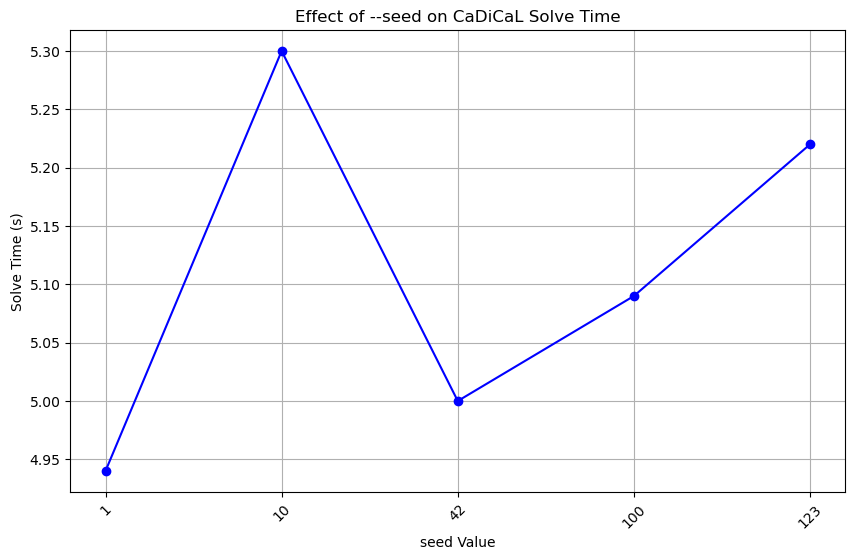

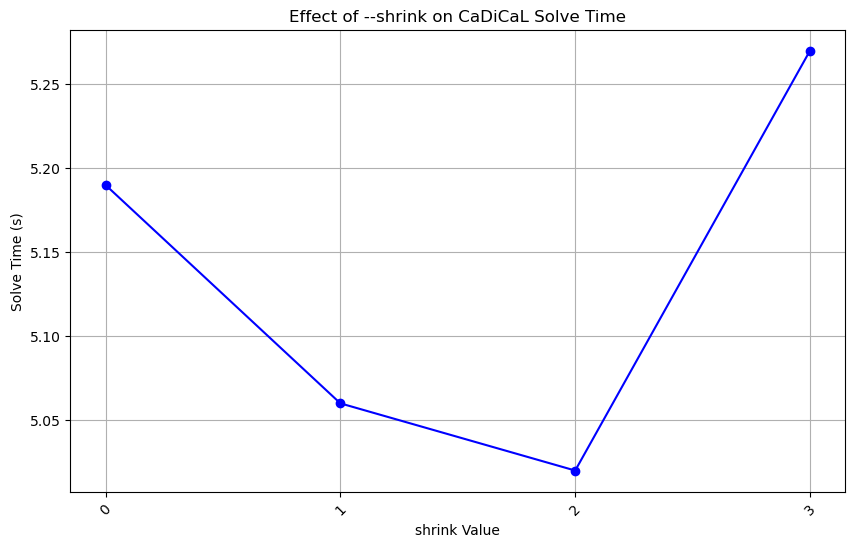

In [1]:
import subprocess
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import time

# Path to CaDiCaL binary and CNF file
cadical_path = "./build/cadical"  # Update with the actual path to the CaDiCaL binary
cnf_file = "example4.cnf"          # Pairwise encoding

# Parameters and their values to test, sorted alphabetically
parameters = {
    "block": ["true", "false"],
    "bump": ["true", "false"],
    "bumpreason": ["true", "false"],
    "bumpreasondepth": ["true", "false"],
    "compact": ["true", "false"],
    "elim": ["true", "false"],
    "elimint": [10, 20, 50, 100, 200, 500, 1000],
    "probe": ["true", "false"],
    "profile": [0, 1, 2],
    "reduce": ["true", "false"],
    "reduceint": [10, 20, 50, 100, 200, 500, 1000],
    "rephase": ["true", "false"],
    "restart": ["true", "false"],
    "restartint": [10, 20, 50, 100, 200, 500, 1000],
    "realtime": ["true", "false"],
    "reluctant": ["true", "false"],
    "seed": [1, 10, 42, 100, 123],
    "shrink": [0, 1, 2, 3],
    "shuffle": ["true", "false"],
    "shufflequeue": ["true", "false"],
    "stabilize": ["true", "false"],
    "subsume": ["true", "false"],
    "vivify": ["true", "false"]
}

# Regex pattern to extract the solve time from CaDiCaL output
metrics_patterns = {
    'time': r"c total process time since initialization:\s+(\d+\.\d+)"
}

# Function to run CaDiCaL with a specific parameter and value, capturing solve time
def run_cadical_with_param(param_name, param_value):
    # Construct the CaDiCaL command
    command = [cadical_path, cnf_file, f"--{param_name}={param_value}"]
    # Run the command and capture output
    result = subprocess.run(command, capture_output=True, text=True)
    
    # Extract solve time from output
    solve_time_match = re.search(metrics_patterns['time'], result.stdout)
    if solve_time_match:
        solve_time = float(solve_time_match.group(1))
        return solve_time
    else:
        print(f"Warning: Solve time not found for {param_name}={param_value}")
        return None

# Dictionary to store results for each parameter
results = {param_name: [] for param_name in parameters.keys()}

# List to store binary parameter results (those with true/false values)
binary_results = []
result_messages = []

# Run CaDiCaL for each parameter, collecting solve times, with a progress bar updating after each parameter
with tqdm(total=len(parameters), desc="Running CaDiCaL") as pbar:
    for param_name in sorted(parameters):
        pbar.set_description(f"Processing parameter {param_name}")
        for param_value in parameters[param_name]:
            solve_time = run_cadical_with_param(param_name, param_value)
            if solve_time is not None:
                results[param_name].append((param_value, solve_time))
                if param_value in ["true", "false"]:
                    binary_results.append((param_name, param_value, solve_time))
                result_messages.append(f"{param_name}={param_value}, solve time={solve_time}")
        pbar.update(1)

# Plotting results for binary parameters
if binary_results:
    # Group results by parameter for plotting
    grouped_results = {}
    for param_name, param_value, solve_time in binary_results:
        if param_name not in grouped_results:
            grouped_results[param_name] = {"true": [], "false": []}
        grouped_results[param_name][param_value].append(solve_time)

    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Track if labels have been added to avoid duplication
    labels_added = {"true": False, "false": False}
    
    for param_name, values in grouped_results.items():
        if not labels_added["true"]:
            plt.plot([param_name] * len(values["true"]), values["true"], 'bo', label="true", alpha=0.6)
            labels_added["true"] = True
        else:
            plt.plot([param_name] * len(values["true"]), values["true"], 'bo', alpha=0.6)

        if not labels_added["false"]:
            plt.plot([param_name] * len(values["false"]), values["false"], 'ro', label="false", alpha=0.6)
            labels_added["false"] = True
        else:
            plt.plot([param_name] * len(values["false"]), values["false"], 'ro', alpha=0.6)

    plt.title("Effect of Binary Parameters on CaDiCaL Solve Time")
    plt.xlabel("Binary Parameters")
    plt.ylabel("Solve Time (s)")
    plt.xticks(rotation=45, ha='right')
    
    # Place the legend outside of the plot area to the right
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    
    # Adjust layout to accommodate the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legend
    plt.show()


# Plot results for other parameters (non-binary)
for param_name, result_data in results.items():
    if result_data and param_name not in grouped_results:  # Plot only non-binary parameters
        param_vals = [str(item[0]) for item in result_data]  # Convert values to strings for categorical plotting
        solve_times = [item[1] for item in result_data]
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.plot(param_vals, solve_times, marker='o', color='b')
        plt.title(f"Effect of --{param_name} on CaDiCaL Solve Time")
        plt.xlabel(f"{param_name} Value")
        plt.ylabel("Solve Time (s)")
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()


Processing parameter vivify: 100%|████████████████████████████████████████████████████████████████| 23/23 [02:18<00:00,  6.03s/it]


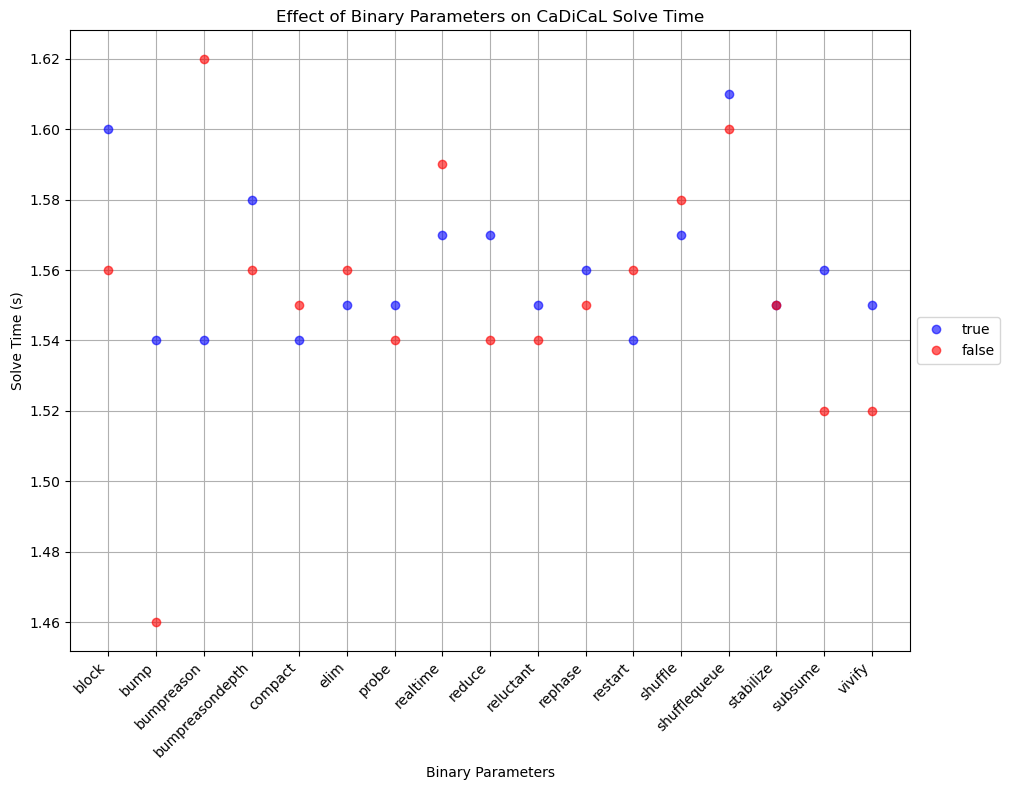

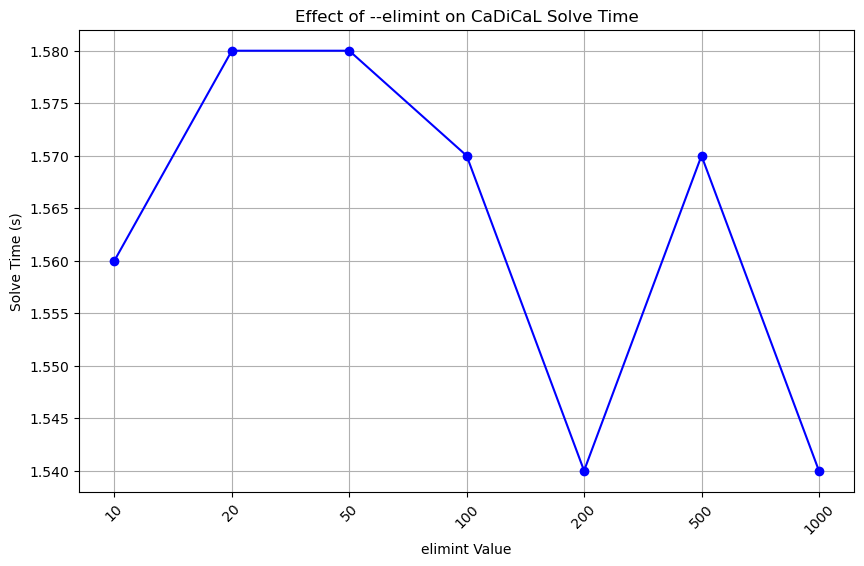

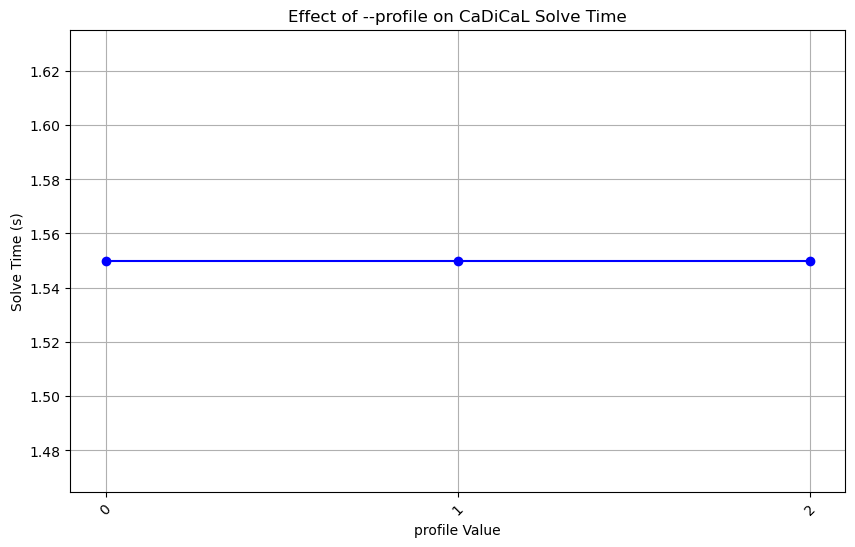

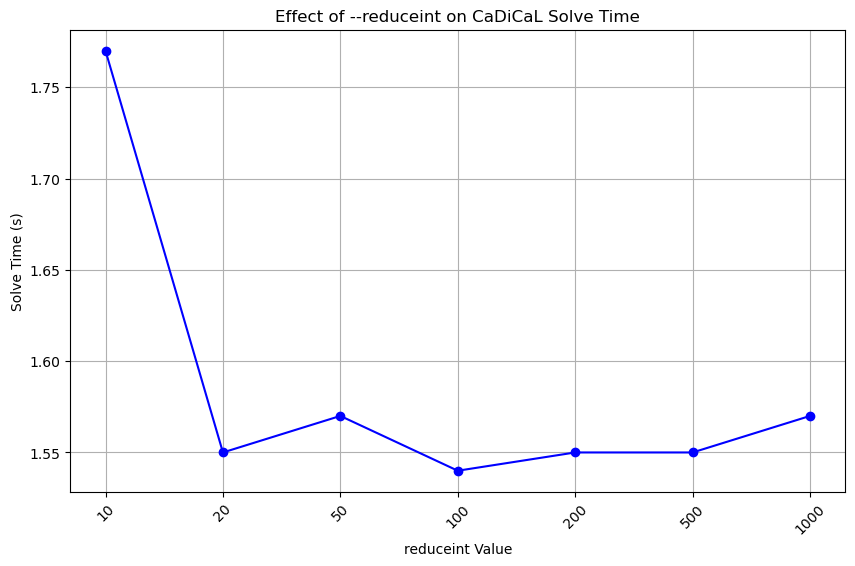

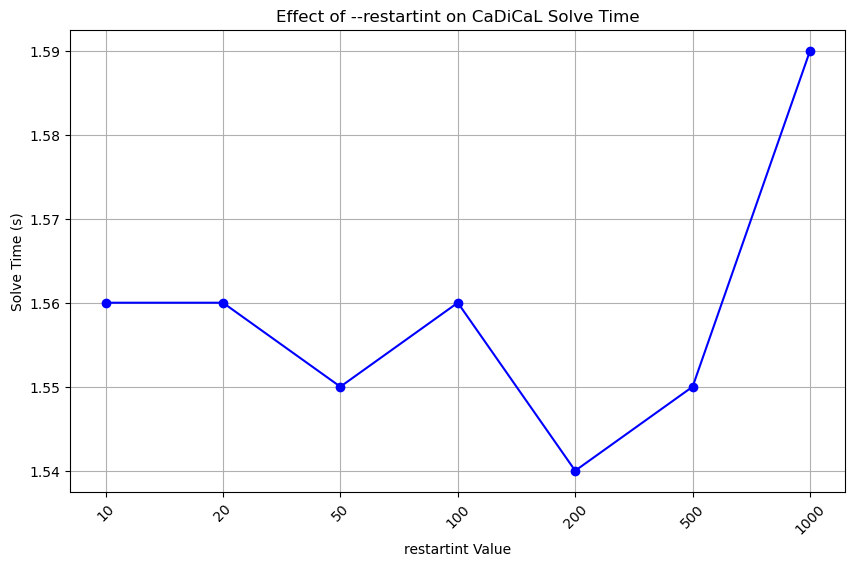

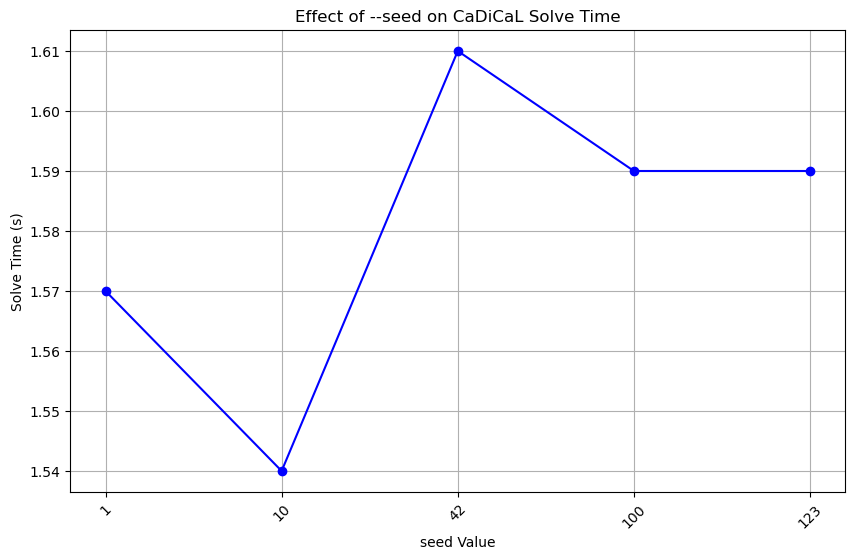

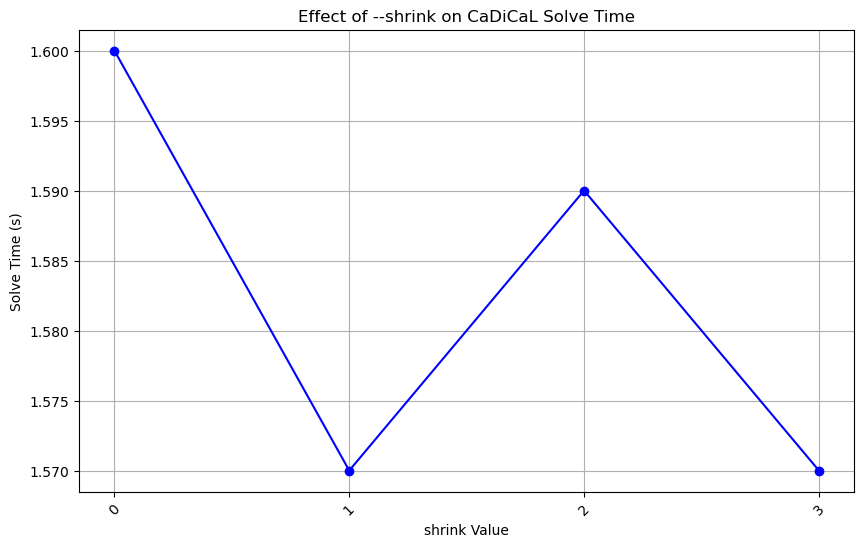

In [2]:
import subprocess
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import time

# Path to CaDiCaL binary and CNF file
cadical_path = "./build/cadical"  # Update with the actual path to the CaDiCaL binary
cnf_file = "example3.cnf"          # Bitwise encoding

# Parameters and their values to test, sorted alphabetically
parameters = {
    "block": ["true", "false"],
    "bump": ["true", "false"],
    "bumpreason": ["true", "false"],
    "bumpreasondepth": ["true", "false"],
    "compact": ["true", "false"],
    "elim": ["true", "false"],
    "elimint": [10, 20, 50, 100, 200, 500, 1000],
    "probe": ["true", "false"],
    "profile": [0, 1, 2],
    "reduce": ["true", "false"],
    "reduceint": [10, 20, 50, 100, 200, 500, 1000],
    "rephase": ["true", "false"],
    "restart": ["true", "false"],
    "restartint": [10, 20, 50, 100, 200, 500, 1000],
    "realtime": ["true", "false"],
    "reluctant": ["true", "false"],
    "seed": [1, 10, 42, 100, 123],
    "shrink": [0, 1, 2, 3],
    "shuffle": ["true", "false"],
    "shufflequeue": ["true", "false"],
    "stabilize": ["true", "false"],
    "subsume": ["true", "false"],
    "vivify": ["true", "false"]
}

# Regex pattern to extract the solve time from CaDiCaL output
metrics_patterns = {
    'time': r"c total process time since initialization:\s+(\d+\.\d+)"
}

# Function to run CaDiCaL with a specific parameter and value, capturing solve time
def run_cadical_with_param(param_name, param_value):
    # Construct the CaDiCaL command
    command = [cadical_path, cnf_file, f"--{param_name}={param_value}"]
    # Run the command and capture output
    result = subprocess.run(command, capture_output=True, text=True)
    
    # Extract solve time from output
    solve_time_match = re.search(metrics_patterns['time'], result.stdout)
    if solve_time_match:
        solve_time = float(solve_time_match.group(1))
        return solve_time
    else:
        print(f"Warning: Solve time not found for {param_name}={param_value}")
        return None

# Dictionary to store results for each parameter
results = {param_name: [] for param_name in parameters.keys()}

# List to store binary parameter results (those with true/false values)
binary_results = []
result_messages = []

# Run CaDiCaL for each parameter, collecting solve times, with a progress bar updating after each parameter
with tqdm(total=len(parameters), desc="Running CaDiCaL") as pbar:
    for param_name in sorted(parameters):
        pbar.set_description(f"Processing parameter {param_name}")
        for param_value in parameters[param_name]:
            solve_time = run_cadical_with_param(param_name, param_value)
            if solve_time is not None:
                results[param_name].append((param_value, solve_time))
                if param_value in ["true", "false"]:
                    binary_results.append((param_name, param_value, solve_time))
                result_messages.append(f"{param_name}={param_value}, solve time={solve_time}")
        pbar.update(1)

# Plotting results for binary parameters
if binary_results:
    # Group results by parameter for plotting
    grouped_results = {}
    for param_name, param_value, solve_time in binary_results:
        if param_name not in grouped_results:
            grouped_results[param_name] = {"true": [], "false": []}
        grouped_results[param_name][param_value].append(solve_time)

    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Track if labels have been added to avoid duplication
    labels_added = {"true": False, "false": False}
    
    for param_name, values in grouped_results.items():
        if not labels_added["true"]:
            plt.plot([param_name] * len(values["true"]), values["true"], 'bo', label="true", alpha=0.6)
            labels_added["true"] = True
        else:
            plt.plot([param_name] * len(values["true"]), values["true"], 'bo', alpha=0.6)

        if not labels_added["false"]:
            plt.plot([param_name] * len(values["false"]), values["false"], 'ro', label="false", alpha=0.6)
            labels_added["false"] = True
        else:
            plt.plot([param_name] * len(values["false"]), values["false"], 'ro', alpha=0.6)

    plt.title("Effect of Binary Parameters on CaDiCaL Solve Time")
    plt.xlabel("Binary Parameters")
    plt.ylabel("Solve Time (s)")
    plt.xticks(rotation=45, ha='right')
    
    # Place the legend outside of the plot area to the right
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    
    # Adjust layout to accommodate the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legend
    plt.show()


# Plot results for other parameters (non-binary)
for param_name, result_data in results.items():
    if result_data and param_name not in grouped_results:  # Plot only non-binary parameters
        param_vals = [str(item[0]) for item in result_data]  # Convert values to strings for categorical plotting
        solve_times = [item[1] for item in result_data]
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.plot(param_vals, solve_times, marker='o', color='b')
        plt.title(f"Effect of --{param_name} on CaDiCaL Solve Time")
        plt.xlabel(f"{param_name} Value")
        plt.ylabel("Solve Time (s)")
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()


Processing parameter vivify: 100%|████████████████████████████████████████████████████████████████| 23/23 [08:27<00:00, 22.07s/it]


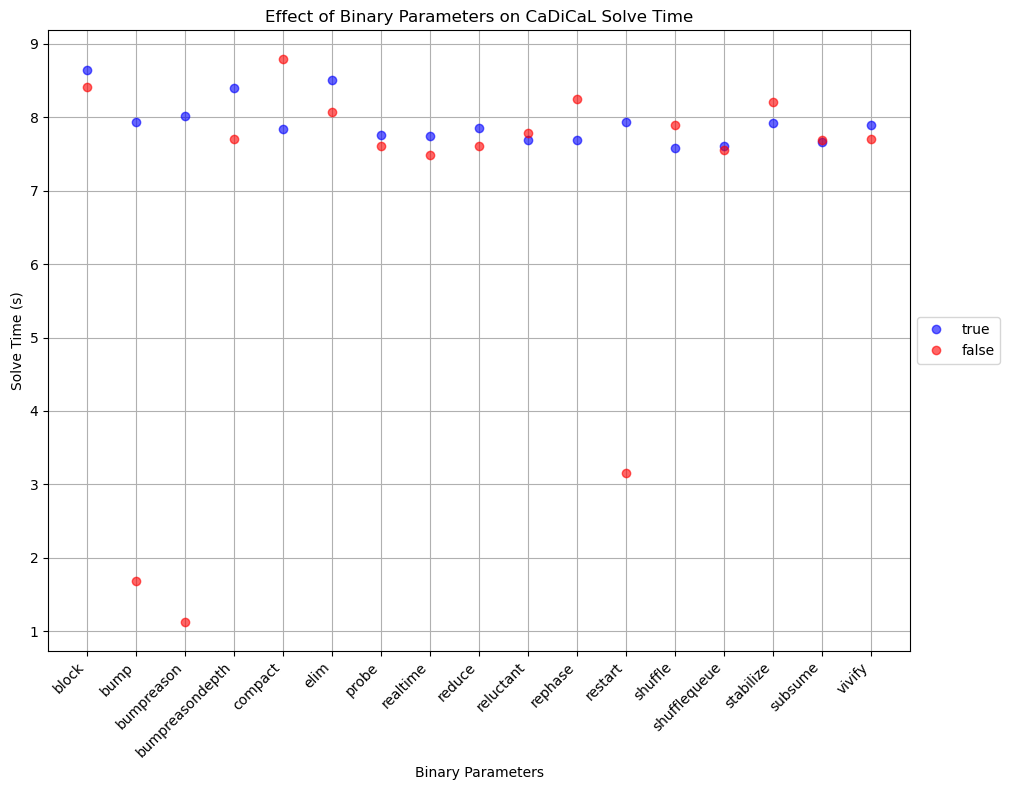

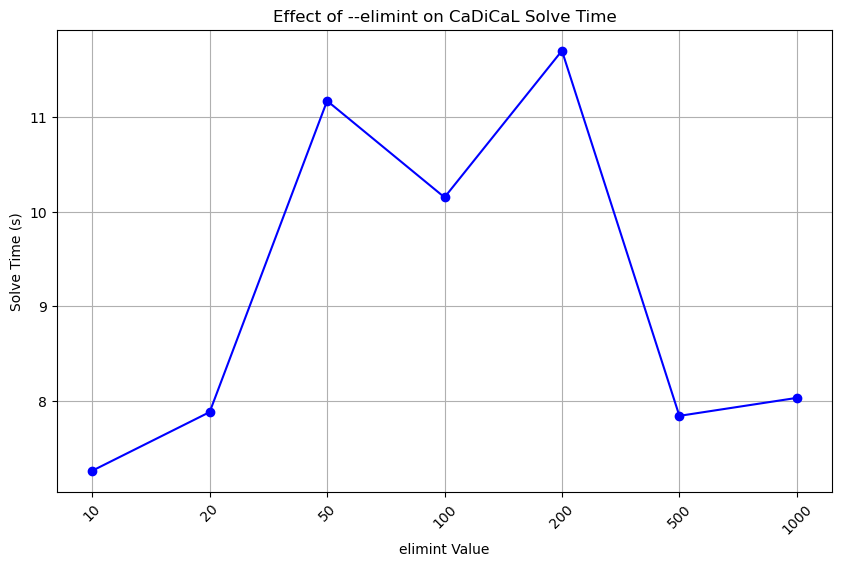

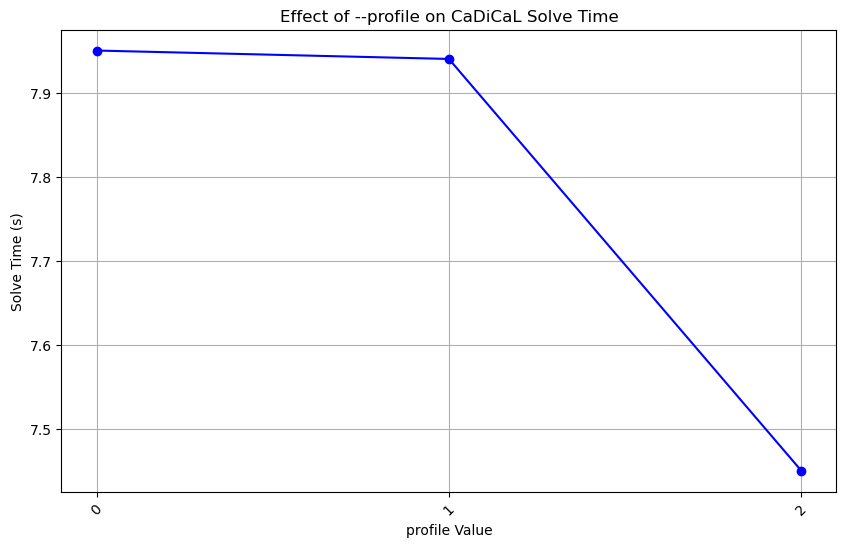

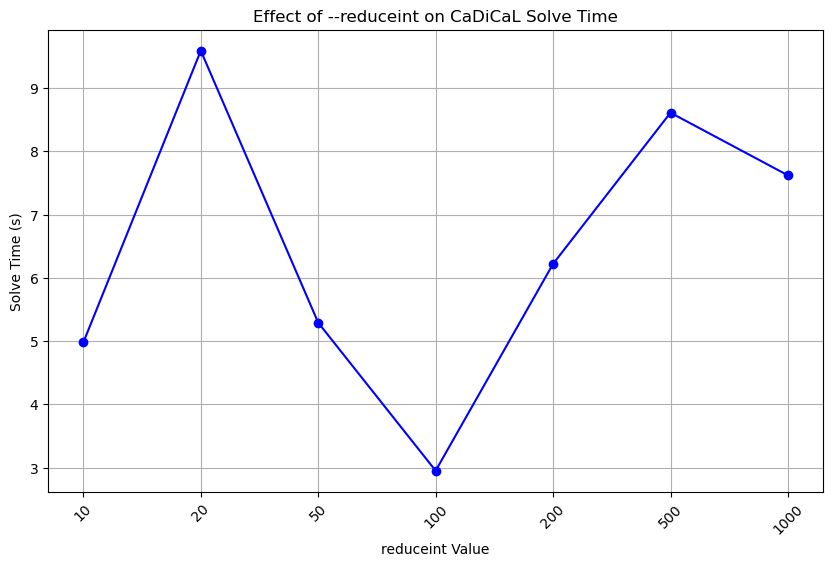

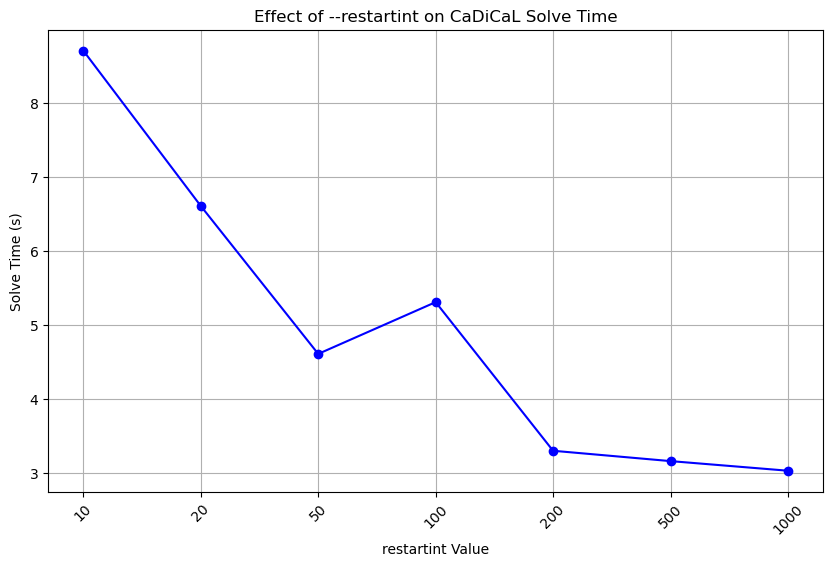

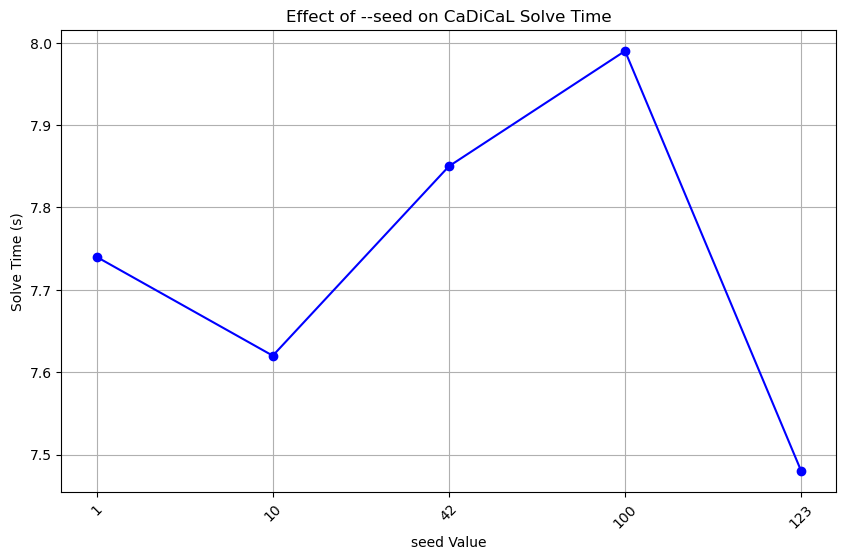

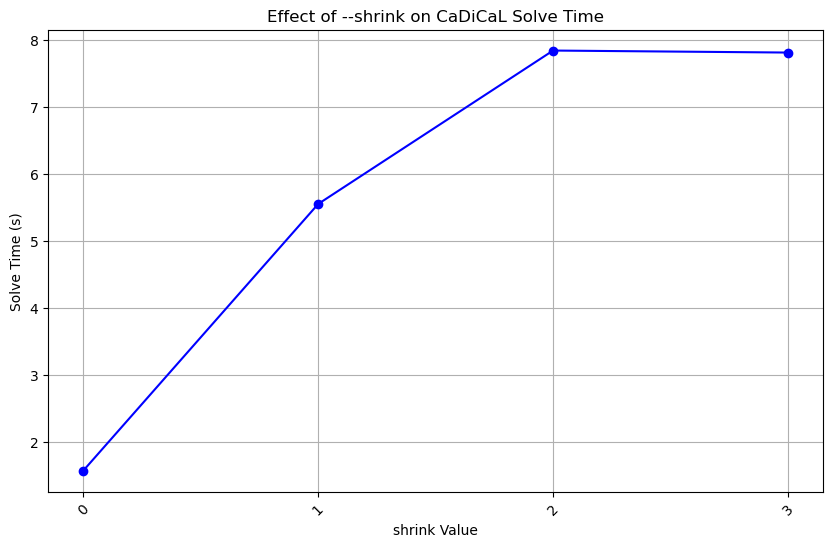

In [3]:
import subprocess
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import time

# Path to CaDiCaL binary and CNF file
cadical_path = "./build/cadical"  # Update with the actual path to the CaDiCaL binary
cnf_file = "example2.cnf"          # Matrix encoding

# Parameters and their values to test, sorted alphabetically
parameters = {
    "block": ["true", "false"],
    "bump": ["true", "false"],
    "bumpreason": ["true", "false"],
    "bumpreasondepth": ["true", "false"],
    "compact": ["true", "false"],
    "elim": ["true", "false"],
    "elimint": [10, 20, 50, 100, 200, 500, 1000],
    "probe": ["true", "false"],
    "profile": [0, 1, 2],
    "reduce": ["true", "false"],
    "reduceint": [10, 20, 50, 100, 200, 500, 1000],
    "rephase": ["true", "false"],
    "restart": ["true", "false"],
    "restartint": [10, 20, 50, 100, 200, 500, 1000],
    "realtime": ["true", "false"],
    "reluctant": ["true", "false"],
    "seed": [1, 10, 42, 100, 123],
    "shrink": [0, 1, 2, 3],
    "shuffle": ["true", "false"],
    "shufflequeue": ["true", "false"],
    "stabilize": ["true", "false"],
    "subsume": ["true", "false"],
    "vivify": ["true", "false"]
}

# Regex pattern to extract the solve time from CaDiCaL output
metrics_patterns = {
    'time': r"c total process time since initialization:\s+(\d+\.\d+)"
}

# Function to run CaDiCaL with a specific parameter and value, capturing solve time
def run_cadical_with_param(param_name, param_value):
    # Construct the CaDiCaL command
    command = [cadical_path, cnf_file, f"--{param_name}={param_value}"]
    # Run the command and capture output
    result = subprocess.run(command, capture_output=True, text=True)
    
    # Extract solve time from output
    solve_time_match = re.search(metrics_patterns['time'], result.stdout)
    if solve_time_match:
        solve_time = float(solve_time_match.group(1))
        return solve_time
    else:
        print(f"Warning: Solve time not found for {param_name}={param_value}")
        return None

# Dictionary to store results for each parameter
results = {param_name: [] for param_name in parameters.keys()}

# List to store binary parameter results (those with true/false values)
binary_results = []
result_messages = []

# Run CaDiCaL for each parameter, collecting solve times, with a progress bar updating after each parameter
with tqdm(total=len(parameters), desc="Running CaDiCaL") as pbar:
    for param_name in sorted(parameters):
        pbar.set_description(f"Processing parameter {param_name}")
        for param_value in parameters[param_name]:
            solve_time = run_cadical_with_param(param_name, param_value)
            if solve_time is not None:
                results[param_name].append((param_value, solve_time))
                if param_value in ["true", "false"]:
                    binary_results.append((param_name, param_value, solve_time))
                result_messages.append(f"{param_name}={param_value}, solve time={solve_time}")
        pbar.update(1)

# Plotting results for binary parameters
if binary_results:
    # Group results by parameter for plotting
    grouped_results = {}
    for param_name, param_value, solve_time in binary_results:
        if param_name not in grouped_results:
            grouped_results[param_name] = {"true": [], "false": []}
        grouped_results[param_name][param_value].append(solve_time)

    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Track if labels have been added to avoid duplication
    labels_added = {"true": False, "false": False}
    
    for param_name, values in grouped_results.items():
        if not labels_added["true"]:
            plt.plot([param_name] * len(values["true"]), values["true"], 'bo', label="true", alpha=0.6)
            labels_added["true"] = True
        else:
            plt.plot([param_name] * len(values["true"]), values["true"], 'bo', alpha=0.6)

        if not labels_added["false"]:
            plt.plot([param_name] * len(values["false"]), values["false"], 'ro', label="false", alpha=0.6)
            labels_added["false"] = True
        else:
            plt.plot([param_name] * len(values["false"]), values["false"], 'ro', alpha=0.6)

    plt.title("Effect of Binary Parameters on CaDiCaL Solve Time")
    plt.xlabel("Binary Parameters")
    plt.ylabel("Solve Time (s)")
    plt.xticks(rotation=45, ha='right')
    
    # Place the legend outside of the plot area to the right
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    
    # Adjust layout to accommodate the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legend
    plt.show()


# Plot results for other parameters (non-binary)
for param_name, result_data in results.items():
    if result_data and param_name not in grouped_results:  # Plot only non-binary parameters
        param_vals = [str(item[0]) for item in result_data]  # Convert values to strings for categorical plotting
        solve_times = [item[1] for item in result_data]
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.plot(param_vals, solve_times, marker='o', color='b')
        plt.title(f"Effect of --{param_name} on CaDiCaL Solve Time")
        plt.xlabel(f"{param_name} Value")
        plt.ylabel("Solve Time (s)")
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()
